In [36]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [37]:
df = pd.read_csv("ses1.csv")

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [38]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [39]:
y = df["Performance Index"]
x = df.drop(columns = "Performance Index")

In [40]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.3, random_state=42)
#kita pecah train 70%, temp 30%
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 42)
#kita pecah si temp (30%) jadi test (15%) dan eval (15%)

In [41]:
le = LabelEncoder()
x_train["Extracurricular Activities"] = le.fit_transform(x_train["Extracurricular Activities"])
x_test["Extracurricular Activities"] = le.fit_transform(x_test["Extracurricular Activities"])
x_eval["Extracurricular Activities"] = le.fit_transform(x_eval["Extracurricular Activities"])

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu", input_shape = (x_train.shape[1],)),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(3, activation="relu"), 
    tf.keras.layers.Dense(1)
])

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(
    optimizer = "adam", 
    loss = "mse", 
    metrics = ["mse"]
)

In [44]:
history = model.fit(x_train, y_train, validation_data = (x_eval, y_eval), epochs = 100)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1199.7465 - mse: 1199.7465 - val_loss: 169.1164 - val_mse: 169.1164
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 702.0270 - mse: 702.0270 - val_loss: 312.4884 - val_mse: 312.4884
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 547.3166 - mse: 547.3166 - val_loss: 362.1958 - val_mse: 362.1958
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 507.1735 - mse: 507.1735 - val_loss: 437.1883 - val_mse: 437.1883
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 446.8134 - mse: 446.8134 - val_loss: 494.5703 - val_mse: 494.5703
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 400.6358 - mse: 400.6358 - val_loss: 569.8829 - val_mse: 569.8829
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 354.9552 - mse: 354.9552 - val_loss: 623.0953 - val_mse: 623.0953
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 352.5126 - mse: 352.5126 - val_loss: 663.5861 -

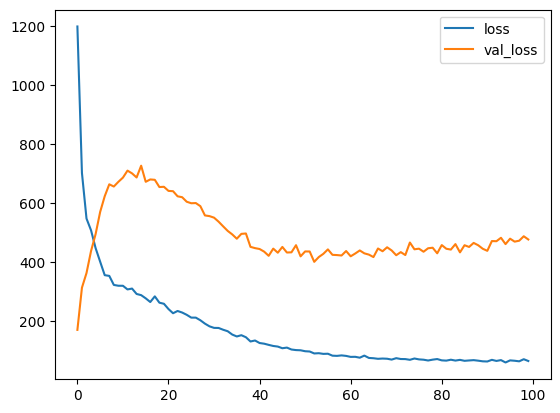

In [45]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [46]:
test = model.evaluate(x_test, y_test)
print(f"Loss: {test[0]}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 497.6319 - mse: 497.6319
Loss: 497.6318664550781


In [47]:
r2_score(y_test, model.predict(x_test))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


-0.3528144652282281

In [48]:
#regularisation -> model yang overtfit jadi ga overfit
#l1 = ngurangin weight yang diupdae/optimize
#l2 = 

hyperparameter tuning (basicly ngulang" buat nyari best fitnya)


percep = [50, 100, 200]
loss = [mae, mse]
activation = [relu, sigmoid, tanh]
10